In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data() # load data set

In [3]:
len(xtrain) # number of train data

60000

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtrain[0].shape # image size according to pixel

(28, 28)

In [6]:
xtrain[0]# getting each pixel's value between 0-255 of zero index image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<Figure size 720x576 with 0 Axes>

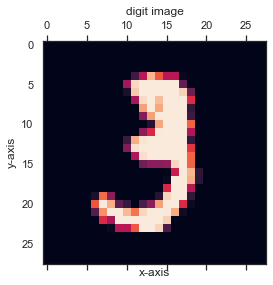

In [7]:
sns.set(style='white')
plt.figure(figsize=(10,8))
plt.matshow(xtrain[10]) # showing an image
plt.title('digit image')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

In [8]:
ytrain[1]

0

In [9]:
xtrain[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [10]:
xtrain=xtrain/255 # convert all pixels values between 0 to 1 
xtest=xtest/255

# Flatten the image
flatten the image/reshape into 28*28 to 784

In [11]:
xtrain=xtrain.reshape(-1,784) # converting 2D to 1D
xtest=xtest.reshape(-1,784)

In [12]:
xtrain_flattened=xtrain.reshape(len(xtrain),28*28) # converting 2D to 1D
xtrain_flattened.shape

(60000, 784)

In [13]:
xtest_flattened=xtest.reshape(len(xtest),28*28) # converting 2D to 1D
xtest_flattened.shape

(10000, 784)

In [14]:
xtrain_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
model=keras.Sequential([ # loding the model
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid') # here 10 = output shape/nouron

])

Scaling is a technique which increase the accuracy of model

In [16]:
model.compile(                     # evaluating accuracy of train dataset
    optimizer='adam',
    loss='SparseCategoricalCrossentropy', # Computes the crossentropy loss between the labels and predictions.
    metrics=['accuracy']
)
model.fit(xtrain_flattened, ytrain, epochs=5) # train the model | epoche=5 number of iteration

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4712 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3040 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2832 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2728 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2665 - accuracy: 0.9259


In [17]:
model.evaluate(xtest_flattened,ytest)  # evaluating accuracy of test dataset

313/313 [==============================] - 1s 2ms/step - loss: 0.2698 - accuracy: 0.9222


[0.2698341906070709, 0.9222000241279602]

| Xtest prediction |

In [26]:
y_predict=model.predict(xtest_flattened)  # xtest predicted
y_predict

313/313 [==============================] - 1s 3ms/step


array([[2.3050737e-02, 3.7082785e-07, 6.3733712e-02, ..., 9.9984246e-01,
        6.5513305e-02, 7.4647301e-01],
       [4.8970741e-01, 6.0306573e-03, 9.9946231e-01, ..., 1.7830185e-12,
        1.2658781e-01, 2.0522684e-09],
       [4.2829625e-04, 9.9296021e-01, 6.3048422e-01, ..., 1.7169422e-01,
        3.2730854e-01, 4.8035115e-02],
       ...,
       [4.5508855e-06, 4.4010167e-06, 1.1879876e-03, ..., 3.8817206e-01,
        3.6794460e-01, 8.6728501e-01],
       [1.3635673e-04, 1.9435320e-04, 1.2722962e-04, ..., 7.0879076e-05,
        5.3881192e-01, 9.0095054e-05],
       [9.4151730e-03, 3.2401196e-10, 1.3335925e-01, ..., 2.3421922e-08,
        1.3329908e-04, 8.0008761e-07]], dtype=float32)

In [27]:
y_predict[0] # approximate all prediction value of zero index

array([2.30507366e-02, 3.70827848e-07, 6.37337118e-02, 9.45264161e-01,
       2.63650203e-03, 1.11034036e-01, 8.78019875e-07, 9.99842465e-01,
       6.55133054e-02, 7.46473014e-01], dtype=float32)

In [28]:
np.argmax(y_predict[0]) # printing the prediction value 

7

In [37]:
y_predict_labels=[np.argmax(i) for i in y_predict] # iterating prediction values 
y_predict_labels[:5]

[7, 2, 1, 0, 4]

In [38]:
ytest[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

| Xtrain prediction |

In [31]:
x_predict=model.predict(xtrain_flattened)  # xtest predicted
x_predict

1875/1875 [==============================] - 5s 3ms/step


array([[2.39615068e-02, 1.19332130e-04, 4.65029813e-02, ...,
        6.33153245e-02, 1.80088319e-02, 1.63448267e-02],
       [9.99884367e-01, 1.73362238e-07, 3.17164324e-02, ...,
        1.55606854e-03, 3.30261551e-02, 2.42792722e-02],
       [8.40225839e-04, 1.09575754e-04, 1.93280548e-01, ...,
        1.45631403e-01, 9.74452589e-03, 9.32317376e-02],
       ...,
       [1.31576778e-02, 5.16753690e-03, 3.47658555e-04, ...,
        1.24405802e-03, 5.69520712e-01, 2.69877240e-02],
       [6.22208342e-02, 1.69965388e-05, 3.93341221e-02, ...,
        1.23162114e-03, 1.07666128e-03, 2.82774051e-03],
       [5.08717895e-01, 2.79881679e-05, 2.35825758e-02, ...,
        4.80035180e-03, 8.68304610e-01, 2.87908375e-01]], dtype=float32)

In [32]:
np.argmax(x_predict[0])

5

In [34]:
ytrain[0]

5

# Cnfusion Matrix

In [41]:
cm=tf.math.confusion_matrix(labels=ytest,predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    4,    6,    3,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   7,   10,  920,   17,   10,    5,   12,   11,   36,    4],
       [   3,    0,   19,  917,    1,   32,    2,   12,   14,   10],
       [   2,    2,    4,    1,  917,    0,    8,    4,    5,   39],
       [  10,    3,    2,   24,   10,  793,   16,    6,   20,    8],
       [  13,    3,    9,    1,    8,   13,  908,    2,    1,    0],
       [   2,    7,   21,    3,    9,    0,    0,  946,    1,   39],
       [  11,   11,    7,   28,   10,   40,    9,   13,  822,   23],
       [  11,    7,    1,   10,   26,    8,    0,   27,    2,  917]])>

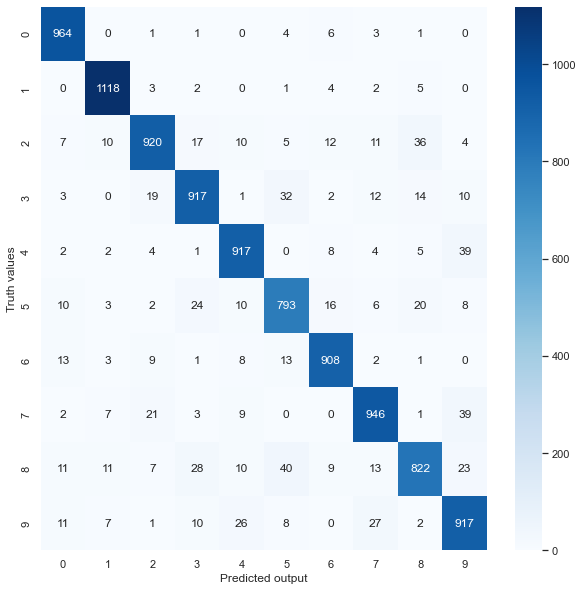

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted output')
plt.ylabel('Truth values')
plt.show()

Note: diagonally values are correct prediction but all other false prediction

# Adding hidden layers

In [103]:
model_1=keras.Sequential([ # loding the model
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), # here 100 = numver shape/nouron of hidden layer which is not fixed
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='softmax') # it is output layer | we can add more hidden layers
])

In [105]:
model_1.compile(                     # evaluating accuracy of train dataset
    optimizer='adam',
    loss='SparseCategoricalCrossentropy', # Computes the crossentropy loss between the labels and predictions.
    metrics=['accuracy']
)
model_1.fit(xtrain_flattened, ytrain, epochs=5) # train the model | epoche=5 number of iteration

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0397 - accuracy: 0.9872
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0314 - accuracy: 0.9899
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0273 - accuracy: 0.9910
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0233 - accuracy: 0.9923
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0223 - accuracy: 0.9927


In [106]:
model_1.evaluate(xtest_flattened,ytest)  # evaluating accuracy of test dataset

313/313 [==============================] - 2s 4ms/step - loss: 0.0914 - accuracy: 0.9782


[0.0914301797747612, 0.9782000184059143]

In [107]:
y_predict=model_1.predict(xtest_flattened)  # xtest predicted
y_predict

313/313 [==============================] - 1s 4ms/step


array([[6.12249834e-11, 3.71360258e-08, 2.53637600e-09, ...,
        9.99998569e-01, 2.29425856e-09, 9.89673367e-07],
       [1.79685478e-09, 2.26408847e-09, 1.00000000e+00, ...,
        3.27859693e-16, 3.76498305e-10, 4.96690525e-18],
       [1.89611828e-08, 9.98441398e-01, 2.26205216e-07, ...,
        2.52173832e-05, 1.52206596e-03, 1.62871871e-07],
       ...,
       [1.58642778e-18, 1.21680157e-11, 8.57293761e-19, ...,
        1.35952298e-08, 1.08508834e-10, 4.67258985e-07],
       [1.35192489e-17, 2.17016064e-22, 3.86653117e-22, ...,
        1.76790996e-17, 2.21635833e-06, 1.42956953e-16],
       [5.08881089e-16, 2.00538669e-19, 1.50683253e-18, ...,
        1.22554788e-23, 1.37363301e-15, 4.88913321e-19]], dtype=float32)

In [108]:
y_predict_labels=[np.argmax(i) for i in y_predict] # iterating prediction values 
y_predict_labels[:5]

[7, 2, 1, 0, 4]

# cofusion matrix of hidden layer

In [109]:
cm_didden=tf.math.confusion_matrix(labels=ytest,predictions=y_predict_labels)
cm_didden

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    1,    0,    1,    2,    1,    9,    1,    1,    1],
       [   0, 1123,    1,    1,    0,    1,    6,    1,    2,    0],
       [   4,    0, 1007,    3,    1,    0,    7,    5,    4,    1],
       [   0,    0,    1,  982,    0,   10,    0,    7,    1,    9],
       [   1,    0,    3,    0,  954,    0,    3,    2,    1,   18],
       [   3,    1,    0,    9,    0,  869,    5,    0,    3,    2],
       [   1,    1,    0,    1,    8,    4,  943,    0,    0,    0],
       [   1,    2,    5,    0,    0,    0,    0, 1008,    5,    7],
       [   2,    1,    2,    7,    0,    4,    5,    3,  946,    4],
       [   0,    2,    0,    4,    5,    2,    1,    5,    3,  987]])>

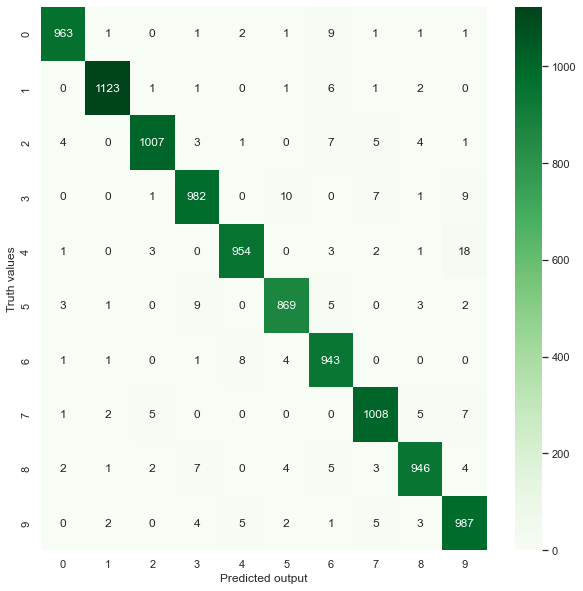

In [110]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_didden, annot=True,fmt='d',cmap='Greens')
plt.xlabel('Predicted output')
plt.ylabel('Truth values')
plt.show()

# Auto Flatten

In [111]:
model_2=keras.Sequential([ # loding the model
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'), # here 100 = numver shape/nouron of hidden layer which is not fixed
    keras.layers.Dense(10,activation='sigmoid') # it is output layer | we can add more hidden layers
])

In [ ]:
model_2.compile(                     # evaluating accuracy of train dataset
    optimizer='adam',
    loss='SparseCategoricalCrossentropy', # Computes the crossentropy loss between the labels and predictions.
    metrics=['accuracy']
)
model_2.fit(xtrain, ytrain, epochs=5)